In [165]:
import numpy as np 
import pandas as pd # data processaing
pd.set_option('display.max_colwidth', 200) # or 199.

In [4]:
food=pd.read_csv('./preprocessed_data.csv')
fd=pd.read_csv('./food_data.csv')

In [60]:
food

,id,'n,(10,(14,(14.5,(15,(flour),(not,(powder),00,...,za'atar,zatarains,zatarain’s,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,10259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,25693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,20130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,22213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,13162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
39770,11462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.338991,0.0,0.0,0.0,0.0
39771,2238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
39772,41882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [157]:
#scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(food)

In [178]:
#pCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(x)
fit = pd.DataFrame(x,columns=['pc1','pc2'],index=food.id)
fit

,pc1,pc2
id,,
10259,-2.269692,-3.688986
25693,0.563387,-1.279839
20130,-0.964841,0.608899
22213,0.350137,0.973409
13162,-1.907392,1.670739
...,...,...
29109,6.167206,0.692495
11462,-0.417655,-3.526069
2238,4.311736,0.328456


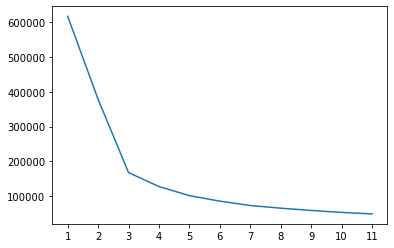

In [167]:
#elbow plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from  matplotlib.pyplot import figure
sse=[]
for k in range(1,12):
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(fit)
    sse.append(km.inertia_)
plt.plot(range(1,12),sse)
plt.xticks(range(1,12))
plt.show()

In [171]:
m=KMeans(n_clusters=3,init='k-means++')
cen=np.array(m.fit(fit).cluster_centers_)

In [250]:
#d matrix
from scipy.spatial import distance_matrix
d= pd.DataFrame(distance_matrix(fit.values,fit.values),index=fit.index,columns=fit.index)
d

id,10259,25693,20130,22213,13162,6602,42779,3735,16903,12734,...,8089,6153,25557,24348,7377,29109,11462,2238,41882,2362
id,,,,,,,,,,,,,,,,,,,,,
10259,0.000000,3.718915,4.491599,5.348031,5.371957,9.954619,1.856668,9.314827,2.178687,0.877535,...,1.958195,6.537374,3.829412,2.324757,2.455206,9.506768,1.859189,7.710710,10.292703,2.342991
25693,3.718915,0.000000,2.429571,2.263316,3.848462,6.235737,3.278149,5.746398,3.473720,4.458535,...,3.608071,3.128683,0.541830,3.708847,1.377943,5.940783,2.451120,4.078815,7.890108,4.039621
20130,4.491599,2.429571,0.000000,1.364565,1.419826,6.648869,3.006585,6.947592,2.935178,5.367917,...,3.205145,2.592625,1.891958,5.542854,3.180495,7.132538,4.171016,5.284024,5.889244,3.376881
22213,5.348031,2.263316,1.364565,0.000000,2.362776,5.286901,4.143799,5.642965,4.143225,6.197225,...,4.391400,1.275166,1.798880,5.898671,3.471888,5.823848,4.564516,4.013754,5.636096,4.634825
13162,5.371957,3.848462,1.419826,2.362776,0.000000,7.320189,3.623768,7.958297,3.418676,6.238649,...,3.704765,3.274240,3.311702,6.760992,4.495179,8.133640,5.406119,6.362332,4.954650,3.682222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29109,9.506768,5.940783,7.132538,5.823848,8.133640,2.205088,9.193179,0.194416,9.348532,10.104573,...,9.514905,4.915007,6.088119,8.529289,7.054717,0.000000,7.820274,1.890845,9.051137,9.910176
11462,1.859189,2.451120,4.171016,4.564516,5.406119,8.502315,2.785660,7.631998,3.137000,2.295280,...,3.064135,5.563863,2.788689,1.372339,1.097788,7.820274,0.000000,6.101189,10.027800,3.561955
2238,7.710710,4.078815,5.284024,4.013754,6.362332,2.614675,7.311789,1.698178,7.461172,8.354198,...,7.631415,3.268235,4.201877,6.952187,5.256664,1.890845,6.101189,0.000000,7.996610,8.021900


In [166]:
#recommendation function pca
from tabulate import tabulate
def pca_rec(id):
    did = d[id]
    id2= did.nsmallest(6,keep='all')
    y=pd.DataFrame(id2.index[1:6])
    y.id.isin(fd.id)
    print("searched recipe: ")
    print(tabulate((fd.iloc[:,1:3].loc[fd['id'] == id]),headers=['ingredients', 'cuisine']))
    print()
    print("\nrecommended recipes: ")
    return pd.DataFrame(fd.iloc[:,1:3].loc[fd['id'].isin(y['id'])])

In [164]:
fd.iloc[:,1:3].loc[fd['id'] == 2362]

,ingredients,cuisine
39773,"green chile,jalapeno chilies,onions,ground black pepper,salt,chopped cilantro fresh,green bell pepper,garlic,white sugar,roma tomatoes,celery,dried oregano",mexican


In [6]:
#word freq
import nltk
vocabulary = nltk.FreqDist()
for ingredients in fd['ingredients']:
    ingredients = ingredients.split(",")
    vocabulary.update(ingredients)
for word, frequency in vocabulary.most_common(200):
    print(f'{word};{frequency}')

salt;18049
onions;7972
olive oil;7972
water;7457
garlic;7380
sugar;6434
garlic cloves;6237
butter;4848
ground black pepper;4785
all-purpose flour;4632
pepper;4438
vegetable oil;4385
eggs;3388
soy sauce;3296
kosher salt;3113
green onions;3078
tomatoes;3058
large eggs;2948
carrots;2814
unsalted butter;2782
ground cumin;2747
extra-virgin olive oil;2747
black pepper;2627
milk;2263
chili powder;2036
oil;1970
red bell pepper;1946
purple onion;1896
scallions;1891
grated parmesan cheese;1886
sesame oil;1773
corn starch;1757
ginger;1755
baking powder;1738
jalapeno chilies;1730
dried oregano;1707
chopped cilantro fresh;1698
fresh lemon juice;1679
diced tomatoes;1624
fresh parsley;1604
minced garlic;1583
chicken broth;1554
sour cream;1539
cayenne pepper;1523
fresh ginger;1503
brown sugar;1503
cooking spray;1490
shallots;1477
garlic powder;1442
lime;1439
lemon juice;1395
fresh lime juice;1368
flour;1348
honey;1299
vanilla extract;1298
paprika;1287
chopped onion;1251
fish sauce;1247
ground cinnamon

In [5]:
#combine all keywords
def soup(x):
    return''.join(x['ingredients']+''+''.join(x['cuisine']))
fd['soup']=fd.apply(soup,axis=1)
fd.soup

0                                                                                     romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumblesgreek
1                                                                          plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oilsouthern_us
2                                                               eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken liversfilipino
3                                                                                                                                                                          water,vegetable oil,wheat,saltindian
4        black pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken sk

In [7]:
#compute inverse doc frequency, reduce importance of common words
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')
tf_matrix=tf.fit_transform(fd.soup)
tf_matrix.shape

(39774, 6945)

In [8]:
#calculate cosine similiarity
from sklearn.metrics.pairwise import linear_kernel
cos_sin=linear_kernel(tf_matrix,tf_matrix)

In [14]:
ind=pd.Series(fd.index,index=fd['id'])

In [129]:
#recommendation function cos sim
def rec(id,cos_sin=cos_sin):
    idx=ind[id]
    sim_scr=list(enumerate(cos_sin[idx]))
    #sort by similarity scores
    sim_scr= sorted(sim_scr,key=lambda x:x[1],reverse=True)
    #top 5 recipes
    sim_scr=sim_scr[1:6]
    fd_ind=[i[0]for i in sim_scr]
    return fd.iloc[:,0:3].iloc[fd_ind]

In [130]:
rec_cos=rec(2362,cos_sin)

In [131]:
rec_cos

,id,ingredients,cuisine
32304,13635,"jalapeno chilies,purple onion,chopped cilantro fresh,salt and ground black pepper,jicama,fresh lemon juice,green onions,garlic cloves,ground cumin,roma tomatoes,diced tomatoes,fresh lime juice",mexican
36867,4653,"jalapeno chilies,salt,cider vinegar,yellow bell pepper,chopped cilantro fresh,roma tomatoes,purple onion,ground cumin,sugar,ground red pepper,fresh lime juice",mexican
35492,42079,"black beans,butter,frozen corn,red bell pepper,green bell pepper,flour,garlic,green chilies,onions,chicken broth,flour tortillas,ground pork,cayenne pepper,sour cream,black pepper,chili powder,sa...",mexican
32258,32134,"lime,salt,roma tomatoes,chopped cilantro,sugar,jalapeno chilies,cumin,white onion,garlic",mexican
30218,14253,"white onion,garlic,sugar,diced green chilies,roasted tomatoes,fresh cilantro,salt,black pepper,jalapeno chilies,ground cumin",mexican


In [37]:
rec_cos[2:3].ingredients

35492    black beans,butter,frozen corn,red bell pepper,green bell pepper,flour,garlic,green chilies,onions,chicken broth,flour tortillas,ground pork,cayenne pepper,sour cream,black pepper,chili powder,sa...
Name: ingredients, dtype: object

In [116]:
import urllib
from bs4 import BeautifulSoup
import requests
import webbrowser
#search google
def ggl(result):
    for ingredients in result.ingredients:
        pg=6
        page = requests.get(f"https://www.google.com/search?q={ingredients}&num={pg}")
        soup = BeautifulSoup(page.content, 'html.parser')
        links = soup.find_all("a")
        for link in links:
            link_href = link.get('href')
            if "url?q=" in link_href and not "webcache" in link_href:
                title = link.find_all('h3')
                if len(title) > 0:
                    print(link.get('href').split("?q=")[1].split("&sa=U")[0])
                    print(title[0].getText())
                    print("------")

ggl(fd.loc[fd['id'] == 2362].iloc[:,1:2])


https://www.walmart.com/ip/Great-Value-Seasoning-Blend-10-oz/865553259
Great Value Seasoning Blend, 10 oz - Walmart.com
------
https://www.walmart.com/ip/Del-Monte-Canned-Diced-Tomatoes-Zesty-Chili-Style-14-5-oz-Can/10295111
Del Monte Canned Diced Tomatoes Zesty Chili Style, 14.5 oz, Can
------
https://www.simplyrecipes.com/recipes/chile_verde/
Chile Verde - Simply Recipes
------
https://www.yummly.com/recipes/homemade-tomato-sauce-fresh-tomatoes
10 Best Homemade Tomato Sauce with Fresh Tomatoes Recipes
------
https://www.yummly.com/recipes/hatch-chile
10 Best Hatch Chile Recipes | Yummly
------


In [159]:
print("recommended recipes: ")
r=rec(2362)
pdtabulate=lambda df:tabulate(df,headers=['id','ingredients', 'cuisine'],tablefmt='psql')
print(pdtabulate(r))
print("\ngoogle suggestion: ")
ggl(fd.loc[fd['id'] == 2362].iloc[:,1:2])

recommended recipes: 
+-------+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+
|       |    id | ingredients                                                                                                                                                                                                                         | cuisine   |
|-------+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------|
| 32304 | 13635 | jalapeno chilies,purple onion,chopped cilantro fresh,salt and ground black pepper,jicama,fresh lemon juice,green onions,garlic cloves,ground cumin,roma tomatoes,diced tomatoes,fres